## EE 242 Lab 5 – Frequency Domain Representation of Signals - Fourier Transform

Caitlin DeShazo-Couchot 

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [25]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt

# import whatever other modules you use in this lab -- there are more that you need than we've included 
import scipy.io.wavfile as wav
import IPython as ip


## Summary

In this lab, we will learn how to build periodic signals from component sinusoids and how to transform signals from the time domain to the frequency domain. The concepts we’ll focus on include: implementation of the Fourier Series synthesis equation, using a discrete implementation of the Fourier Transform (DFT) with a digitized signal, and understanding the relationship between the discrete DFT index k and frequency
ω for both the original continuous signal x(t). This is a two-week lab.  You should plan on completing the first 2 assignments in the first week.

## Lab 3b turn in checklist

•	Lab 3b Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)




## Assignment 3 -- Analyzing frequency content of a signal

For this assignment, you will use a discrete Fourier transform (specifically, the Python implementation of an FFT) to analyze the frequency content of the 100ms segment of the horn signal from assignment 2. Because this is a periodic signal, the frequency content will have spikes, but because it is a discrete-time signal, they will have finite height. You will experiment with different FFT sizes and different plotting options. The description below assumes that you import numpy as np.

**A.** Use the np.fft.fft function to compute the FFT for the 100 ms horn signal, with an fft size of nfft=1024, which you can call **xhf**. Recall that the result of the FFT will be a vector that spans frequencies [0,$f_s$]. If this is a real-valued signal, then the first half of the FFT matters: [0,nfft/2]. In order to get positive and negative frequencies, you need to use the np.fft.fftshift function to get **xhf2**. Create two different plots of the magnitude of result using **(np.abs(.))** in a 2x1 view: one with positive and negative frequencies and one with just positive frequencies. Be sure to scale according to time signal window length. Label the frequency axis in terms of Hz by creating a vector **freq** that scales the FFT index by $f_s$/nfft. The one-sided version should look like the picture above. The two-sided version should be an even function.

**B.** It is often the case that frequency content is plotted on a log scale. Again using a 2x1 view, plot the one-sided (positive frequency) magnitude using both linear and log scale.

**C.**  Changing the size of the FFT will change the frequency resolution, but it also changes the shape of the result a bit. Just as we saw with Gibbs phenomenon where increasing the number of Fourier series coefficients gave a high frequency ringing at sharp edges, increasing the FFT window will give a “ringing” effect for sharp peaks in frequency. To see this effect, compute the FFT using nfft=2048 and plot the log magnitude compared to nfft=1024, in both cases just using positive frequencies. (The effect is easier to see when plotting magnitude on a log scale.)


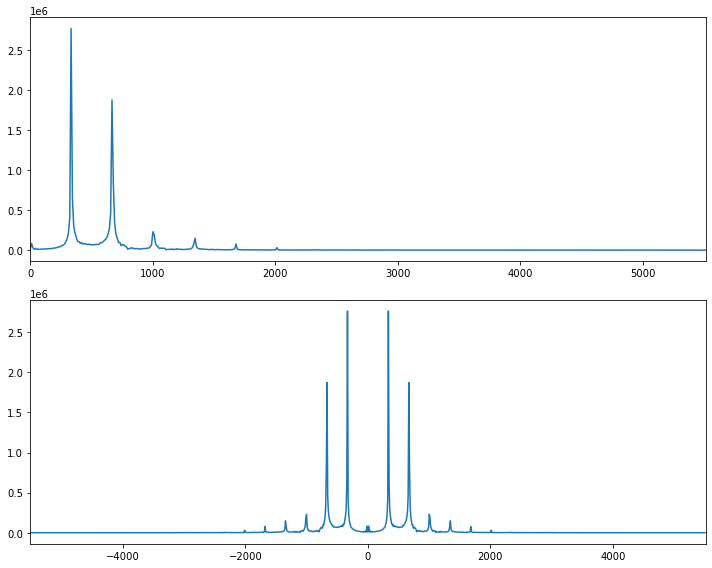

In [ ]:
# Assignment 3 - Analyzing frequency content of a signal

fss, horn = wav.read('horn11short.wav')
single = horn[int(fss * 0.2): int(fss * 0.3)]
lim = int(fss/2)

#A. Plot a one-sided and two-sided Fourier Transform
fft_size = 1024
xhf = np.fft.fft(single, fft_size)
xhf2 = np.fft.fftshift(xhf)
nfft = 2048
xhf3 = np.fft.fft(single, nfft)
freq = np.arange(0, fss, fss/fft_size)
freq2048 = np.arange(0, fss, fss/nfft)
fft_shift_freq = np.arange(-lim, lim, fss/fft_size)

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.xlim(0, lim)
plt.plot(freq, np.abs(xhf))

plt.subplot(2,1,2)
plt.xlim(-lim, lim)
plt.plot(fft_shift_freq, np.abs(xhf2))

plt.tight_layout()

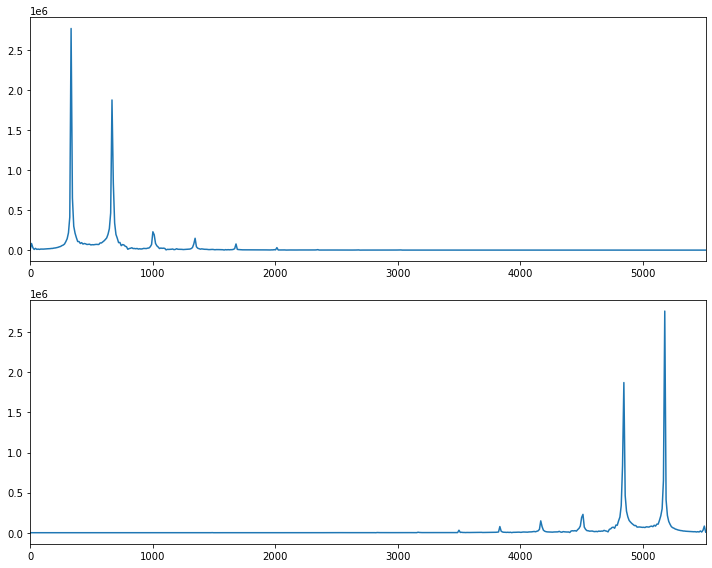

In [32]:
#B. Plot a one-sided linear and log scaled Fourier Transform
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.xlim(0, lim)
plt.plot(freq, np.abs(xhf))

plt.subplot(2,1,2)
plt.xlim(0, lim)
plt.plot(freq, np.abs(xhf2))

plt.tight_layout()

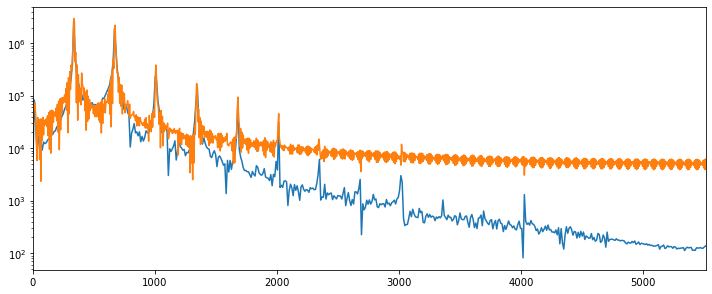

In [33]:
#C. Plot the Fourier Transform by changing the size
plt.figure(figsize=(10,8))

plt.subplot(2,1,2)
plt.xlim(0, lim)
plt.yscale('log')
plt.plot(freq, np.abs(xhf))
plt.plot(freq2048, np.abs(xhf3))

plt.tight_layout()

###  Discussion

In Lab 4, we used specific cosine frequencies to approximate the horn note,
assuming the signal is periodic so the harmonics have non-zero energy. The FFT results show a different picture, and the synthesized version is easily distinguished from the original. Discuss reasons for these differences.

The sampling rate of frequencies is different. In Lab 4, it was simplified and only 6 values were used to transform the signal whereas with the Fourier transform, the signal transform is a couple thousand frequencies, which makes a more accurate signal.

## Assignment 4 -- Comparing frequency content of a signal

Many interesting time signals have changing frequency content. Music is one example, since different notes have different fundamental frequency. Speech is another example: we distinguish different vowels and consonants based on their frequency content. In this assignment, you will use the FFT to compare the frequency content of two different speech sounds in a sentence. We’ll use 30ms windows, where the frequency content is relatively stable.

**A.**  Download the signal "bluenose3.wav", and read in the file. Plot the full waveform, using the sampling frequency to correctly label the time access. Play the file.

**B.**  Extract the samples corresponding to times [0.75,0.78]. (This corresponds to the “oo” sound in the word “grew.”) Using a 2x1 plot, plot the time waveform (labeling the time axis with the specified time region) and the magnitude of the frequency response (positive frequencies only, labeling the frequency axis in Hz).

**C.**  Repeat the exercise above using the samples corresponding to times [2.565,2.595]. (This corresponds to the “s” sound.)

**D.** State what size FFT you used and explain your choice. Comment on the differences
between the time and frequency plots for the two segments and the auditory differences.



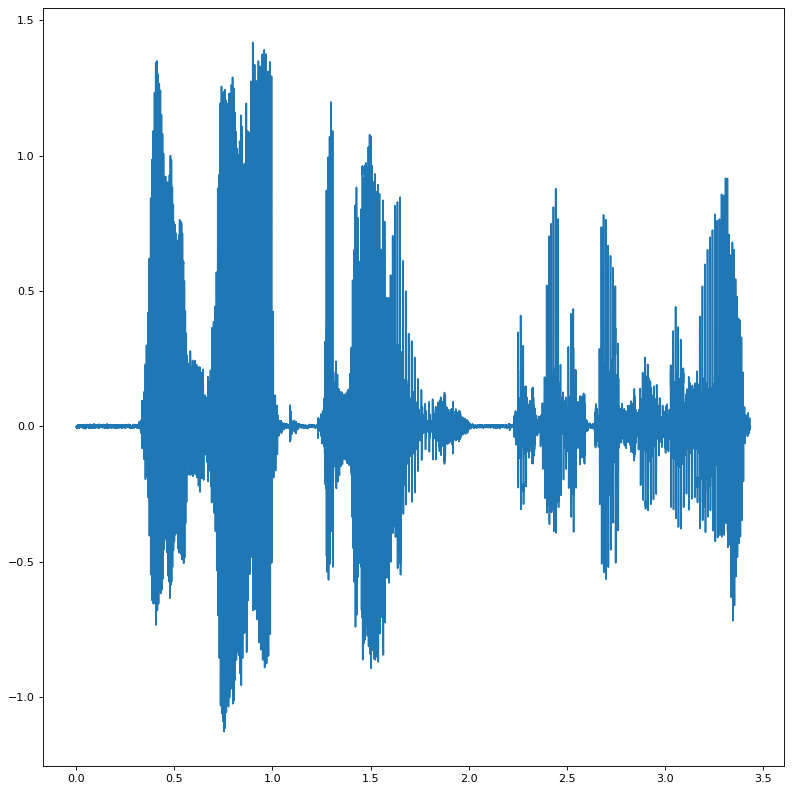

In [34]:
# Assignment 4 - Comparing frequency content of a signal
#A. Plot full waveform.

bn_rate, bn_sound = wav.read('bluenose3.wav')

samples = len(bn_sound)
t_bn = np.arange(0, samples/bn_rate, 1/bn_rate)

plt.figure(5, figsize=(10,10), dpi=80)

plt.plot(t_bn, bn_sound / bn_rate)
plt.tight_layout()

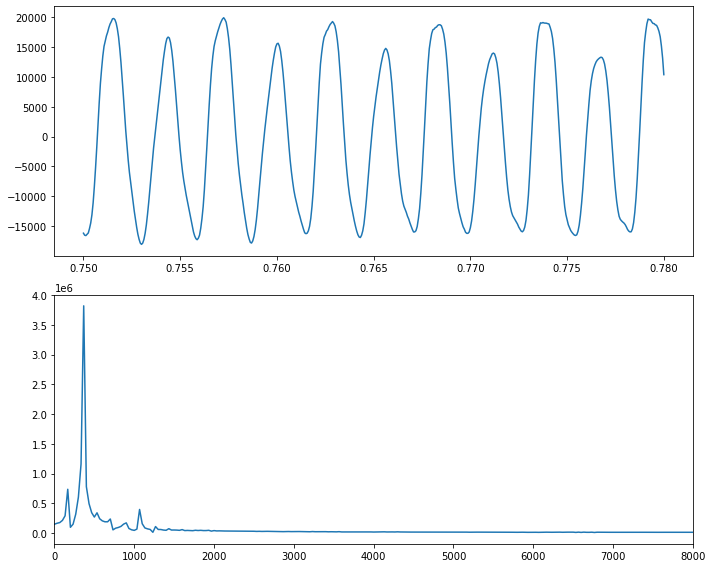

In [35]:
#B. Extract and plot the sampeles corresponding to times [0.75, 0.78].
oo = bn_sound[int(0.75*bn_rate):int(0.78*bn_rate)+1]

oo_time = np.arange(0.75, 0.78, 1/bn_rate)
nfft_2 = int(0.03*bn_rate)
oo_freq = np.arange(0, bn_rate, bn_rate/nfft_2)
wav.write('oo.wav', bn_rate, oo.astype('int16'))
oo_mag = np.fft.fft(oo, nfft_2)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(oo_time, oo)

plt.subplot(2,1,2)
plt.xlim(0, int(bn_rate/2))
plt.plot(oo_freq, np.abs(oo_mag))

plt.tight_layout()


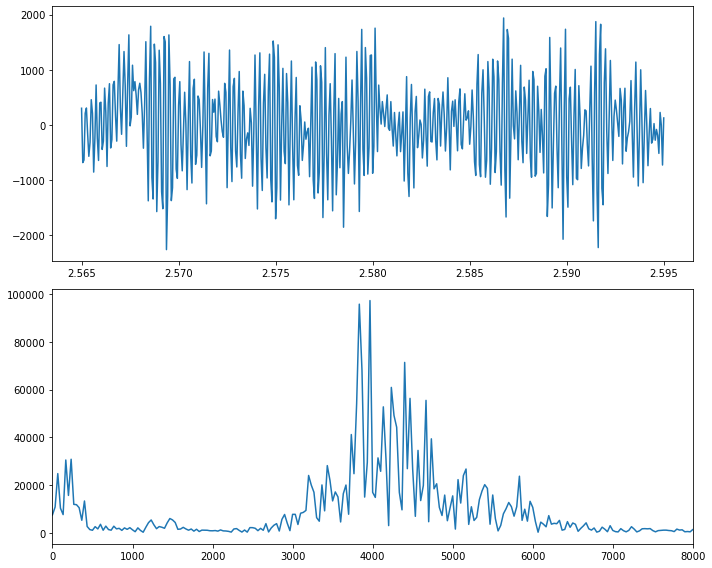

In [38]:
#C. Isolating the s part of the sound.
s = bn_sound[int(2.565*bn_rate):int(2.595*bn_rate)+1]

s_time = np.arange(2.565, 2.595, 1/bn_rate)
s_freq = np.arange(0, bn_rate, bn_rate/nfft_2)
wav.write('s.wav', bn_rate, s.astype('int16'))
s_mag = np.fft.fft(s, nfft_2)

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(s_time,s)

plt.subplot(2,1,2)
plt.xlim(0, int(bn_rate/2))
plt.plot(s_freq, np.abs(s_mag))

plt.tight_layout()

###  Discussion

State what size FFT you used and explain your choice. Comment on the differences between the time and frequency plots for the two segments and the auditory differences.

I chose 720 from 15ms * sampling rate of 16000 Hz, and compared it with 2048. The sampling frequency and rate naturally caused the sound to be altered. A higher band caused a higher quality of sound and vice versa for small bands. However, the higher the quality of sound the more demanding it was which ultimately is bad for complex, large, or real-time Fourier Transforms.

For the frequency and time plots of 'oo' and 's' the s was a mid frequency with a irratic plot and the oo was a low freuqency with a sinusoidal plot.